In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

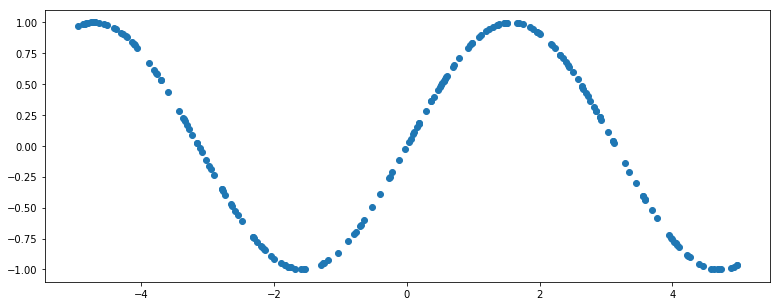

In [2]:
x_train = torch.rand(200)
x_train = x_train * 10.0 - 5

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o');

In [6]:
y_train.shape

torch.Size([200])

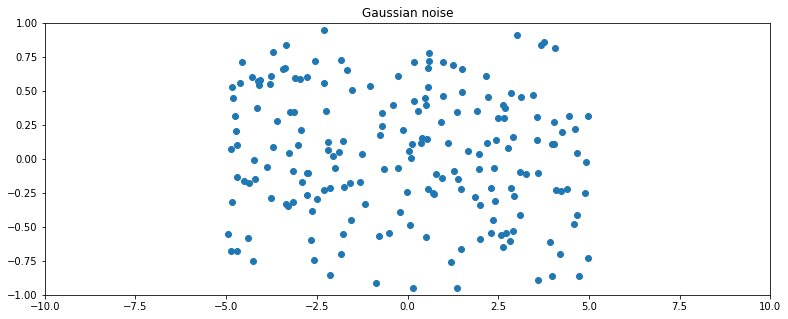

In [9]:
noise = torch.randn(y_train.shape) / 2.

# plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.plot(x_train, noise, 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

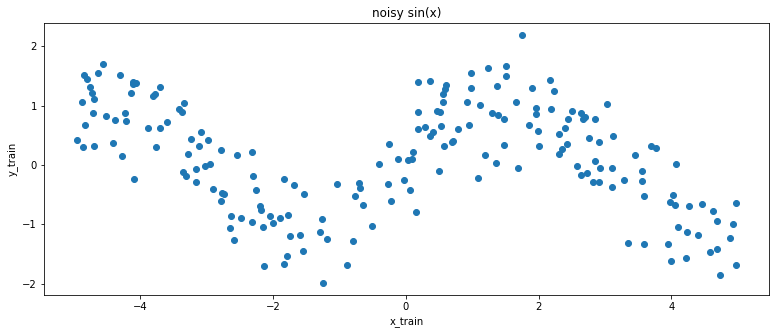

In [10]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [61]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

# Validation dataset

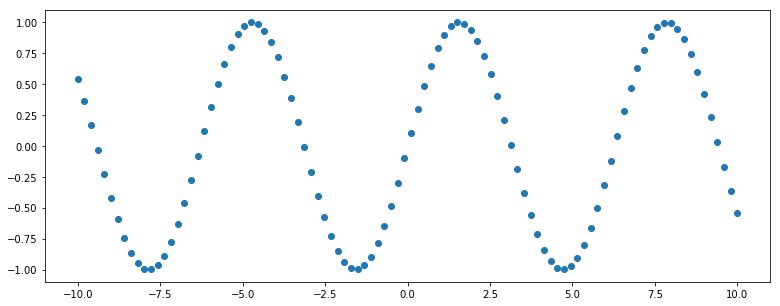

In [63]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o');

In [64]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model

In [73]:
class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

net = Net(10)

# Prediction

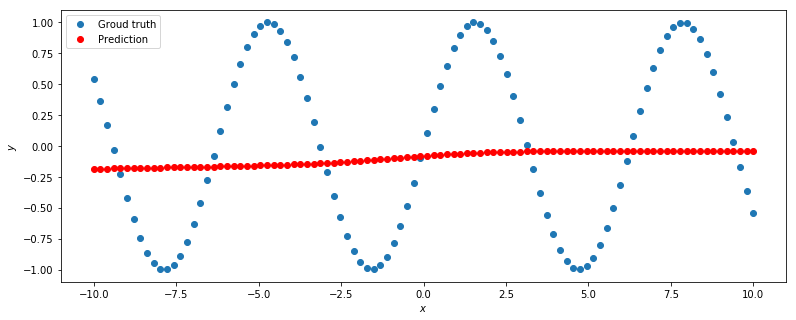

In [74]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(net, x_validation, y_validation)

# Optimizer

In [75]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Loss function

In [76]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

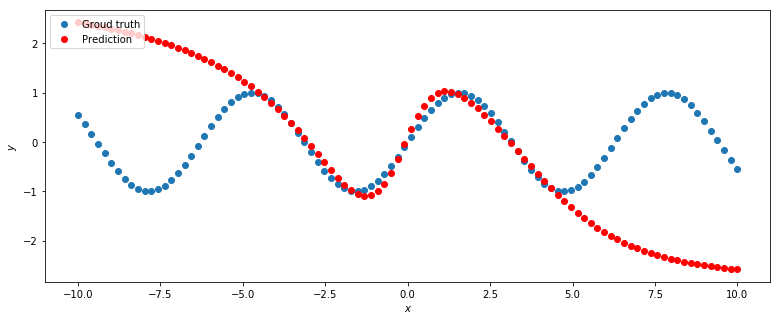

In [81]:
for epoch_index in range(20000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(net, x_validation, y_validation)